<a href="https://colab.research.google.com/github/MDGF93/IaCD/blob/main/Trabalho_Final_ICD_Grupo_2_0412.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/MDGF93/IaCD/blob/main/Trabalho_Final_ICD_Grupo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório de Projeto Final - Grupo 2
**Introdução à Ciência de Dados - Prof. Gustavo Oliveira - Semestre 2021/1**


***Equipe:***
- Ismael Alves Lima, ‘Ismael.alves@academico.ufpb.br’
- Jansen Cruz de Souza, ‘jansen.souza@gmail.com’
- Marcos Dantas Guimarães Filho, ‘mdgf@academico.ufpb.br’
- Ramon Azevedo dos Santos Cavalcanti, ‘ramontolete12@gmail.com’
- Renan Cavalcanti Florentino ‘renanflorentino2011@gmail.com’




## Resumo

Este relatório tem a finalidade de analisar os dados referente a movimentação do gás natural nas regiões do Brasil. A ideia seria mapear o nível de produtividade desse insumo principalmente na região Nordeste, já que o investimento em gasodutos veio à tona, devido também à atual crise elétrica. Aplicamos a técnica de heatmap para destacar o potencial para produção de gás natural nas regiões do Brasil




## Descrição do problema

No Brasil, com a crise de energia elétrica, tomou impulso um grande esforço do governo brasileiro para incrementar a expansão da potência instalada através de usinas termelétricas alimentadas por gás natural (PRAÇA, 2003).

Em geral, as perspectivas para a utilização plena e racional do gás natural no mundo são bastante promissoras, pois é possível obter alta eficiência energética utilizando sistemas de cogeração, produzindo conjuntamente calor (ou frio) e energia. Além disso, diversas outras aplicações no setor veicular, industrial e residencial podem ser incrementadas, configurando-se nos chamados “usos nobres” do gás natural (SANTOS, 2002).

A questão central que buscamos responder é: *podemos construir um mapa de calor sobre as regiões do Brasil pelo qual possamos, rapidamente, visualizar o potencial de geração de gás natural no Nordeste?* *Podemos enxergar quais seriam os indices de produtividade, disponibilidade e consumo na região do Nordeste ao longo dos anos?* *Durante o período de pandemia houve algum crescimento no que diz respeito ao aumento do consumo, produção e disponibilidade na área?*  *Através de técnicas de predição utilizando o método regressão linear, é possível verificar se haverá gás natural disponível por quantos anos?*

## Metodologia de solução

Para resolver o problema proposto, usamos a seguinte metodologia:


1.  Coleta de dados no site da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP), órgão regulador das atividades que integram as indústrias de petróleo, gás natural e de biocombustíveis no Brasil. Abaixo estão os códigos que foram utilizados para realizar a coleta dos arquivos de *dataframe* diretamente do site da ANP.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_cons = pd.read_csv(
    "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/ppgn-el/consumo-proprio-gn1000m3-2000-2021.csv",
    sep=";",
)
df_prod = pd.read_csv(
    "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/ppgn-el/producao-gas-natural-1000m3-1997-2021.csv",
    sep=";",
)
df_disp = pd.read_csv(
    "https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/ppgn-el/gn-disponivel-1000m3-2000-2021.csv",
    sep=";",
)

2.  Para limpeza e processamento dos dados foram utilizados os módulos pandas e numpy da linguagem da programação Python para construição dos *DataFrames* contendo os parâmetros mais relevantes da análise. A seguir, mostramos como foi realizada a limpeza dos dados colhidos:


Trocando as vírgulas por ponto nos valores númericos, pois o Pandas não funcionaria corretamente caso seja utilizado vírgulas como separador decimal.

In [ ]:
for idx in range(len(df_cons)):
    df_cons.at[idx, "CONSUMO"] = df_cons.at[idx, "CONSUMO"].replace(",", ".")
for idx in range(len(df_prod)):
    df_prod.at[idx, "PRODUÇÃO"] = df_prod.at[idx, "PRODUÇÃO"].replace(",", ".")
for idx in range(len(df_disp)):
    df_disp.at[idx, "DISPONÍVEL"] = df_disp.at[idx, "DISPONÍVEL"].replace(",", ".")

Convertendo o `datatype` das colunas em númerico.

In [ ]:
df_cons["CONSUMO"] = pd.to_numeric(df_cons["CONSUMO"])
df_prod["PRODUÇÃO"] = pd.to_numeric(df_prod["PRODUÇÃO"])
df_disp["DISPONÍVEL"] = pd.to_numeric(df_disp["DISPONÍVEL"])

Renomeando as colunas para que seja possível utilizar o método `.query()` do Pandas para realizar a filtragem dos dados, pois alguns caracteres presentes na língua portuguesa não são suportados pelo método `.query()`.

In [ ]:
df_cons = df_cons.rename(
    columns={
        "ANO": "ano",
        "MÊS": "mes",
        "GRANDE REGIÃO": "granderegiao",
        "UNIDADE DA FEDERAÇÃO": "unidadedafederacao",
        "PRODUTO": "produto",
        "LOCALIZAÇÃO": "localizacao",
        "CONSUMO": "consumo",
    }
)
df_prod = df_prod.rename(
    columns={
        "ANO": "ano",
        "MÊS": "mes",
        "GRANDE REGIÃO": "granderegiao",
        "UNIDADE DA FEDERAÇÃO": "unidadedafederacao",
        "PRODUTO": "produto",
        "LOCALIZAÇÃO": "localizacao",
        "PRODUÇÃO": "producao",
    }
)
df_disp = df_disp.rename(
    columns={
        "ANO": "ano",
        "MÊS": "mes",
        "GRANDE REGIÃO": "granderegiao",
        "UNIDADE DA FEDERAÇÃO": "unidadedafederacao",
        "PRODUTO": "produto",
        "LOCALIZAÇÃO": "localizacao",
        "DISPONÍVEL": "disponivel",
    }
)

Agrupando todos os dados em um `DataFrame` apenas, para que seja possível trabalhar de forma mais eficiente e também garantir que trabalhemos apenas com datas que estão presentes nas três tabelas

In [ ]:
df_final = pd.merge(
    pd.merge(
        df_cons,
        df_prod,
        on=[
            "produto",
            "ano",
            "mes",
            "granderegiao",
            "unidadedafederacao",
            "localizacao",
        ],
    ),
    df_disp,
    on=[
        "produto",
        "ano",
        "mes",
        "granderegiao",
        "unidadedafederacao",
        "localizacao",
    ],
)

A seguir, o df_final, podemos destacar que foi realizado a junção das três bases (produção, disponibilidade e consumo), e foi agrupado por ano, mês e localização (via mar ou terra).

In [ ]:
df_final

,ano,mes,granderegiao,unidadedafederacao,produto,localizacao,consumo,producao,disponivel
0,2000,AGO,REGIÃO NORDESTE,RIO GRANDE DO NORTE,GÁS NATURAL,MAR,4344.20600,75850.51330,40493.70730
1,2000,SET,REGIÃO NORDESTE,RIO GRANDE DO NORTE,GÁS NATURAL,MAR,5063.35000,70891.20230,33923.55230
2,2000,JUN,REGIÃO NORDESTE,RIO GRANDE DO NORTE,GÁS NATURAL,MAR,4845.84910,73282.75120,36890.90210
3,2000,JUL,REGIÃO NORDESTE,RIO GRANDE DO NORTE,GÁS NATURAL,MAR,5175.34110,74975.48180,35342.44070
4,2000,DEZ,REGIÃO NORDESTE,RIO GRANDE DO NORTE,GÁS NATURAL,MAR,4709.74010,76444.35990,42537.31980
...,...,...,...,...,...,...,...,...,...
5730,2021,JAN,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,2300.17289,2921.18219,124.90307
5731,2021,OUT,REGIÃO NORDESTE,BAHIA,GÁS NATURAL,TERRA,3766.83539,71599.09679,51650.20804
5732,2021,MAI,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,3297.75392,2455.21675,-1344.76544
5733,2021,ABR,REGIÃO SUDESTE,ESPÍRITO SANTO,GÁS NATURAL,TERRA,3108.67292,2721.90882,-858.69010


Criando uma nova coluna, `datacompleta`, que irá receber a data completa no formato DD/MM/AAAA para cada entrada, e convertendo-a para o `datatype` do tipo `datatetime`

In [ ]:
data_completa = []
for idx, ano in enumerate(df_final['ano']):
    mes = df_final.at[idx,'mes']
    if mes == 'JAN':
        mes = "01"
    elif mes == 'FEV':
        mes = '02'
    elif mes == 'MAR':
        mes = '03'
    elif mes == 'ABR':
        mes = '04'
    elif mes == 'MAI':
        mes = '05'
    elif mes == 'JUN':
        mes = '06'
    elif mes == 'JUL':
        mes = '07'
    elif mes == 'AGO':
        mes = '08'
    elif mes == 'SET':
        mes = '09'
    elif mes == 'OUT':
        mes = '10'
    elif mes == 'NOV':
        mes = '11'
    elif mes == 'DEZ':
        mes = '12'
    data = f"01/{mes}/{str(ano)}"
    data_completa.append(data)
    
df_final['datacompleta'] = data_completa
df_final['datacompleta'] = pd.to_datetime(df_final['datacompleta'])

E, por fim, arrendodamos todos os números para 2 casas decimais, com o inuito de facilitar a leitura dos dados.

In [ ]:
df_final = df_final.round(2)

### Dataframes de métricas notáveis

Com relação a base de dados da ANP para produção, disponibilidade e consumo, é valido salientar que somente os ***índices nacionais*** são levados em consideração. Ou seja, qualquer valor referente ao uso de gás natural no Brasil, que seja de ***origem estrangeira***, não é computado nos índices da ANP. Isso explica o motivo da **região sul** do país apresentar valores nulos para esse três índices, tendo em vista que todo o gás natural consumido nessa região provem único e exclusivamente da Bolívia (SULGÁS, 2021).

Todos os números para consumo, produção e disponibilidade têm como unidade de medida ***mil m³*** (ANP, 2021).

Para região Centro-oeste, especificamente nos estados do Mato Grosso e Mato Grosso do Sul, todo o gás comprado estava destinado exclusivamente às Termelétricas, de modo que o gráfico de consumo se apresenta nulo, já os gráficos de disponibilidade e produção também não assumem valores relevantes, pois o principal fornecedor da região é através do Gasbol (Gasoduto Bolívia-Brasil) (MIRKO, 2009).

A seguir, mostramos um recorte de um dos *DataFrames* apresentando as médias de ***consumo, disponibilidade e produção*** de Gás Natural, no período de 2019 até 2021, de cada região do Brasil.

In [ ]:
df_final.query("ano >= 2019").groupby(["granderegiao","ano"]).mean().round(2)


consumo   producao  disponivel
granderegiao    ano                                  
REGIÃO NORDESTE 2019   2325.40   33340.98    26124.52
                2020   1314.32   25330.56    21731.02
                2021   1116.27   32204.70    29349.21
REGIÃO NORTE    2019   7352.22  232128.31   101046.19
                2020   6711.64  206549.03   105844.39
                2021   6479.67  205161.62   109344.78
REGIÃO SUDESTE  2019  64717.95  477111.82   222219.16
                2020  69479.47  528399.03   199733.03
                2021  68165.09  544326.44   182393.54
REGIÃO SUL      2019      0.00       0.00        0.00
                2020      0.00       0.00        0.00
                2021      0.00       0.00        0.00

Em seguida realizamos a análise de correlação entre as colunas de consumo, produção e disponibilidade.

Como se é esperado, o índice de correlação entre as três colunas: `producao`, `disponivel` e `consumo` é bastante elevado:

In [ ]:
df_final.drop(columns=['ano']).corr()

,consumo,producao,disponivel
consumo,1.000000,0.915793,0.877907
producao,0.915793,1.000000,0.930340
disponivel,0.877907,0.930340,1.000000


### Carregamento dos dados geoespaciais

Carregamento dos dados geográficos para o `geopandas`:

In [ ]:
#Colunas que não serão utilizadas
    #id_elementoprodutor
    #cd_insumo_orgao
    #id_produtor
    #nomeabrev
    #nr_insumo_mes
    #nr_insumo_ano
    #tx_insumo_documento
    #geometriaaproximada

import geopandas as gpd
info_ufs = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')
info_ufs = info_ufs.drop(columns=['id_elementoprodutor', 'cd_insumo_orgao',
                                 'id_produtor','nomeabrev','nr_insumo_mes',
                                 'nr_insumo_ano','tx_insumo_documento',
                                 'geometriaaproximada'])

Separando o *DataFrame* do mapa do Brasil em cinco, um para cada região, para que seja mais fácil trabalhar com as regiões de maneira individual.

In [ ]:
regiao = []
for cod in info_ufs['geocodigo']:
    if cod.startswith("1"):
        regiao.append("REGIÃO NORTE")
    elif cod.startswith("2"):
        regiao.append("REGIÃO NORDESTE")
    elif cod.startswith("3"):
        regiao.append("REGIÃO SUDESTE")
    elif cod.startswith("4"):
        regiao.append("REGIÃO SUL")
    else:
        regiao.append("REGIÃO CENTRO-OESTE")
info_ufs['granderegiao'] = regiao

grouped = info_ufs.groupby(info_ufs.granderegiao)
nordeste = grouped.get_group("REGIÃO NORDESTE")
norte = grouped.get_group("REGIÃO NORTE")
sudeste = grouped.get_group("REGIÃO SUDESTE")
sul = grouped.get_group("REGIÃO SUL")
centroeste = grouped.get_group("REGIÃO CENTRO-OESTE")


## Resultados, análise e discussão

É importante destacar que o gás natural encontrado em jazidas normalmente está associado ao petróleo. Constitui reservas finitas, e, conforme pesquisas realizadas pela IEA (Agência Internacional de Energia), caso se mantenha o ritmo de consumo médio da última década, as jazidas de gás natural irão se esgotar em 100 anos. Essa fonte energética agride menos o meio ambiente que o petróleo e o carvão mineral. No entanto, por ser de origem fóssil, sua combustão contribui para o efeito de estufa (FRANCISCO, W).

### Análise dos Resultados

Este relatório foi realizado através da análise de três base de dados, são elas: Consumo, Disponibilidade e Produção. A primeira obtivemos um total de 5745 registros, a segunda com 5752 e por fim a terceira com 6477 registros.



In [ ]:
soma = df_final.groupby(["ano","granderegiao"]).sum()
media = df_final.groupby(["ano","granderegiao"]).mean()
desvio = df_final.groupby(["ano","granderegiao"]).std()

In [ ]:
soma

consumo     producao   disponivel
ano  granderegiao                                         
2000 REGIÃO NORDESTE   496710.59   4873160.94   3191202.08
     REGIÃO NORTE      101192.00   2000200.00    153909.44
     REGIÃO SUDESTE   1139792.76   6362310.10   3100494.91
     REGIÃO SUL           518.00     47206.00         0.00
2001 REGIÃO NORDESTE   466524.05   4831959.59   3261137.27
...                          ...          ...          ...
2020 REGIÃO SUL             0.00         0.00         0.00
2021 REGIÃO NORDESTE   133951.93   3864564.04   3521905.06
     REGIÃO NORTE      129593.48   4103232.33   2186895.50
     REGIÃO SUDESTE   4089905.22  32659586.59  10943612.28
     REGIÃO SUL             0.00         0.00         0.00

[88 rows x 3 columns]

In [ ]:
soma.reset_index(inplace=True)
media.reset_index(inplace=True)
desvio.reset_index(inplace=True)

De acordo com o *DataFrame* acima mostramos o total em mil metros cúbicos, separados por ano em cada região do Brasil.



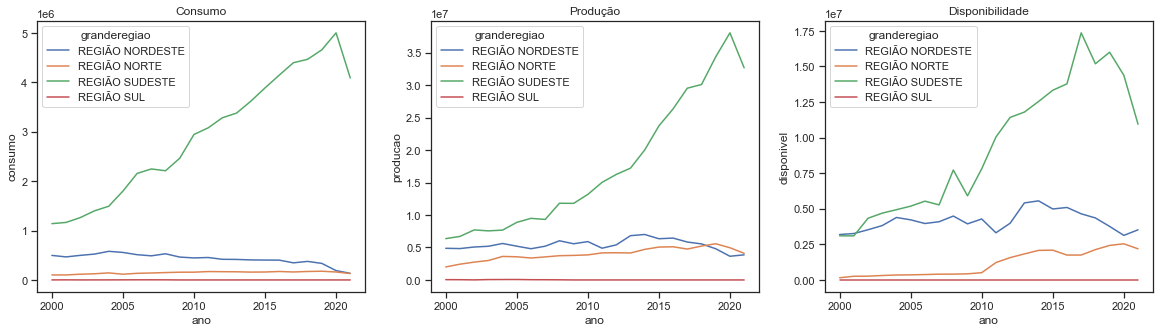

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=False)

sns.lineplot(ax=axes[0],x="ano",y="consumo",data=soma, hue='granderegiao')
axes[0].set_title("Consumo")

sns.lineplot(ax=axes[1],x="ano",y="producao",data=soma, hue='granderegiao')
axes[1].set_title("Produção")

sns.lineplot(ax=axes[2],x="ano",y="disponivel",data=soma, hue='granderegiao')
axes[2].set_title("Disponibilidade")

plt.show()

De acordo com os gráficos acima, o consumo total de cada região brasileira, com exceção do centro-oeste, entre o período de 2000 a 2021. Percebe-se houve uma variação pequena no consumo ao longo dos anos nas regiões Norte, Nordeste e Sul. É notável que a região Sudeste estava em constante crescimento até o ano de 2020, porém em 2021 podemos perceber uma queda de visivel que pode ser interpretada por conta do período de pandemia. É preciso notar, também, que para a região Sul a partir do ano de 2009, não há mais registros de para a região.

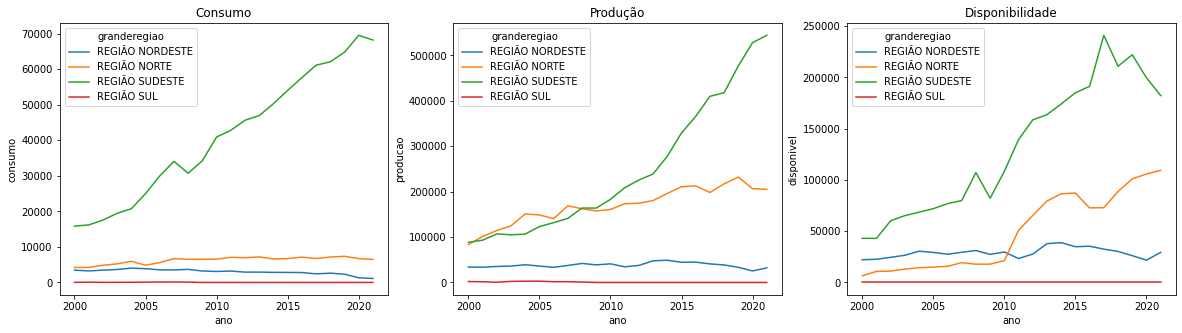

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=False)

sns.lineplot(ax=axes[0],x="ano",y="consumo",data=media, hue='granderegiao')
axes[0].set_title("Consumo")

sns.lineplot(ax=axes[1],x="ano",y="producao",data=media, hue='granderegiao')
axes[1].set_title("Produção")

sns.lineplot(ax=axes[2],x="ano",y="disponivel",data=media, hue='granderegiao')
axes[2].set_title("Disponibilidade")

plt.show()

É possível perceber um aumento gradativo de produtividade na região sudeste ao longo dos anos, enquanto as regiões Norte e Nordeste apresentam estabilidade na produção. Nota-se que a produção na região Sudeste estava em crescimento até o ano de 2020, contudo, em 2021 podemos perceber uma queda que, segundo a ANP, foi motivada pela interrupção temporária da produção em alguns campos, devido aos efeitos da pandemia da COVID-19. Fica evidente, também, que para a região Sul a partir do ano de 2009, não há mais registros de produção.



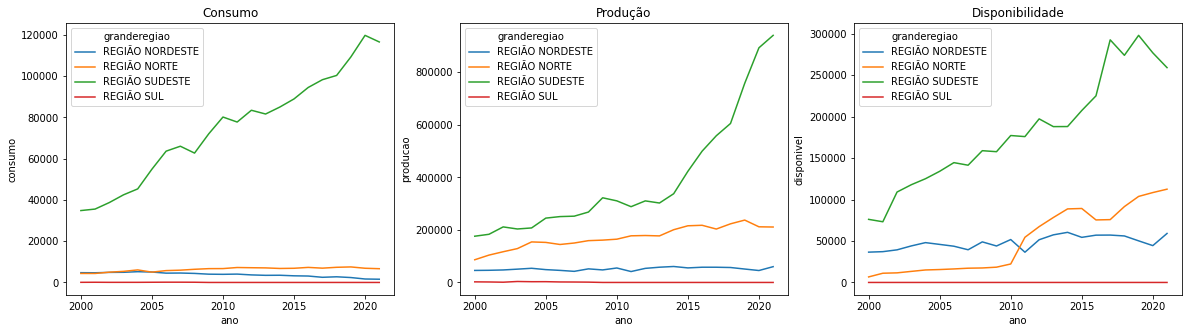

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=False)

sns.lineplot(ax=axes[0],x="ano",y="consumo",data=desvio, hue='granderegiao')
axes[0].set_title("Consumo")

sns.lineplot(ax=axes[1],x="ano",y="producao",data=desvio, hue='granderegiao')
axes[1].set_title("Produção")

sns.lineplot(ax=axes[2],x="ano",y="disponivel",data=desvio, hue='granderegiao')
axes[2].set_title("Disponibilidade")

plt.show()

De acordo com os gráficos de desvio padrão acima, podemos destacar que a discrepância de aumento da região Sudeste, no que diz respeito a produção e disponibilidade, deve-se ao aumento de volume de consumo de determinados estados na referida região (Ex. Estado de São Paulo).

In [ ]:
corr = df_final.drop(columns=["ano"]).corr()

corr

,consumo,producao,disponivel
consumo,1.000000,0.915793,0.877907
producao,0.915793,1.000000,0.930340
disponivel,0.877907,0.930340,1.000000


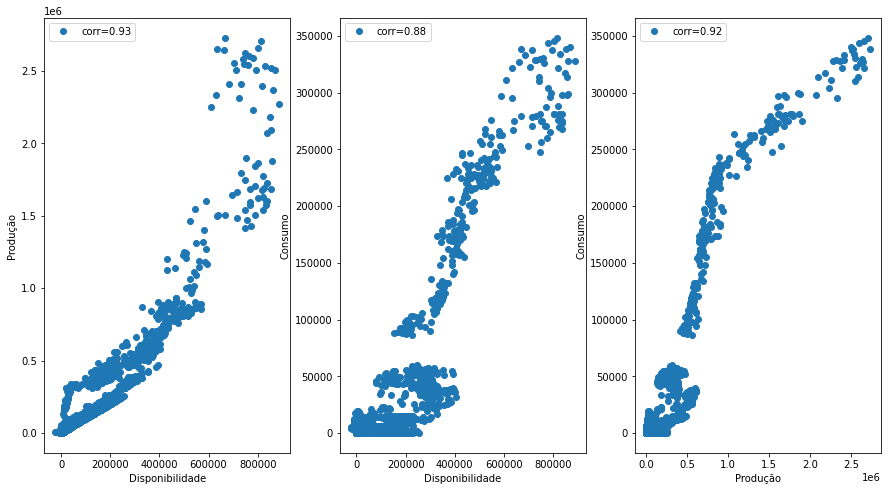

In [ ]:
corr_consumo_disp = corr['consumo'].iloc[2].round(2)
corr_consumo_prod = corr['consumo'].iloc[1].round(2)
corr_prod_disp = corr['producao'].iloc[2].round(2)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
# plot 1
ax[0].plot(
    df_final["disponivel"],
    df_final["producao"],
    "o",
    label=f"corr={corr_prod_disp}",
)
ax[0].set_xlabel("Disponibilidade")
ax[0].set_ylabel("Produção")
ax[0].legend()
# plot 2
ax[1].plot(
    df_final["disponivel"],
    df_final["consumo"],
    "o",
    label=f"corr={corr_consumo_disp}",
)
ax[1].set_xlabel("Disponibilidade")
ax[1].set_ylabel("Consumo")
ax[1].legend()

# plot 3
ax[2].plot(
    df_final["producao"],
    df_final["consumo"],
    "o",
    label=f"corr={corr_consumo_prod}",
)
ax[2].set_xlabel("Produção")
ax[2].set_ylabel("Consumo")
ax[2].legend()

plt.show()

ADICIONAR MAIS TEXTO AQUI

Agrupando os dados em diferentes *DataFrames*, um para cada região

In [ ]:
grouped = df_final.groupby(df_final.granderegiao)
nordeste_dados = grouped.get_group("REGIÃO NORDESTE")
norte_dados = grouped.get_group("REGIÃO NORTE")
sudeste_dados = grouped.get_group("REGIÃO SUDESTE")
sul_dados = grouped.get_group("REGIÃO SUL")


In [ ]:
teste = nordeste_dados.query("ano == 2016").groupby(["unidadedafederacao",'ano']).mean().round(2)

teste.reset_index(inplace=True)

In [ ]:
nordeste_teste = nordeste.copy()

In [ ]:
nordeste_teste.reset_index(inplace = True)

In [ ]:
nordeste_teste.drop(columns=["index"], inplace=True)

In [ ]:
for idx in range(len(nordeste_teste["nome"])):
    nordeste_teste.at[idx, "nome"] = nordeste_teste.at[idx, "nome"].upper()

In [ ]:
nordeste_teste

,nome,sigla,geocodigo,geometry,granderegiao
0,SERGIPE,SE,28,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",REGIÃO NORDESTE
1,ALAGOAS,AL,27,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",REGIÃO NORDESTE
2,PIAUÍ,PI,22,"MULTIPOLYGON (((-41.73344 -2.81111, -41.73205 ...",REGIÃO NORDESTE
3,PARAÍBA,PB,25,"MULTIPOLYGON (((-37.21443 -6.03725, -37.20704 ...",REGIÃO NORDESTE
4,CEARÁ,CE,23,"MULTIPOLYGON (((-40.42389 -2.81130, -40.41525 ...",REGIÃO NORDESTE
5,BAHIA,BA,29,"MULTIPOLYGON (((-38.97119 -8.78270, -38.95972 ...",REGIÃO NORDESTE
6,PERNAMBUCO,PE,26,"MULTIPOLYGON (((-32.38846 -3.81629, -32.39054 ...",REGIÃO NORDESTE
7,RIO GRANDE DO NORTE,RN,24,"MULTIPOLYGON (((-35.20267 -5.74677, -35.20324 ...",REGIÃO NORDESTE
8,MARANHÃO,MA,21,"MULTIPOLYGON (((-42.03760 -2.70322, -42.04097 ...",REGIÃO NORDESTE


In [ ]:
teste = teste.rename(columns={"unidadedafederacao":"nome"})


In [ ]:
teste

,nome,ano,consumo,producao,disponivel
0,ALAGOAS,2016,46.60,17428.38,17128.17
1,BAHIA,2016,3528.78,113509.88,98163.72
2,CEARÁ,2016,1073.36,1557.68,347.44
3,MARANHÃO,2016,398.76,80262.09,79778.28
4,RIO GRANDE DO NORTE,2016,5622.60,16201.11,9429.15
5,SERGIPE,2016,6043.12,39550.76,7339.09


In [ ]:
nordeste_teste = nordeste_teste.merge(teste, on=["nome"],how="left")

In [ ]:
nordeste_teste = nordeste_teste.fillna(0)

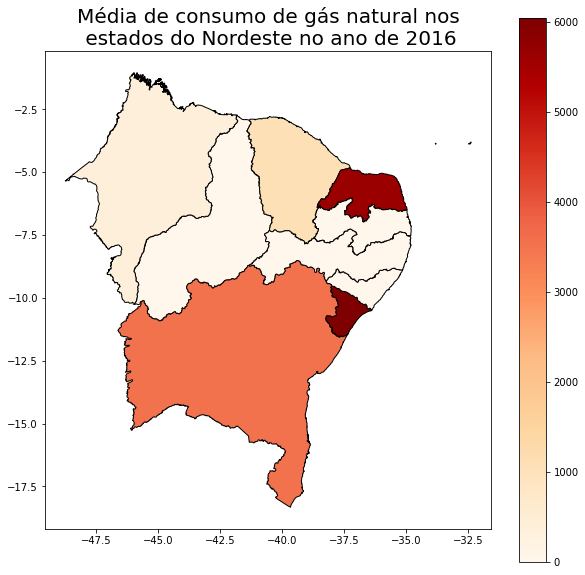

In [ ]:
nordeste_teste.plot(column = 'consumo',
                    cmap="OrRd",
                   figsize = (10,10),
                   legend = True,
                   edgecolor = 'black')
plt.title("Média de consumo de gás natural nos\n estados do Nordeste no ano de 2016",
         fontdict={"fontsize":20})
plt.show()

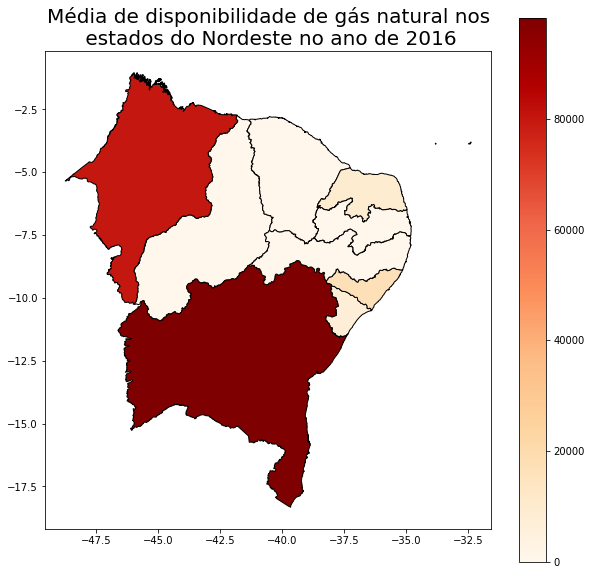

In [ ]:
nordeste_teste.plot(column = 'disponivel',
                    cmap="OrRd",
                   figsize = (10,10),
                   legend = True,
                   edgecolor = 'black')
plt.title("Média de disponibilidade de gás natural nos\n estados do Nordeste no ano de 2016",
         fontdict={"fontsize":20})
plt.show()

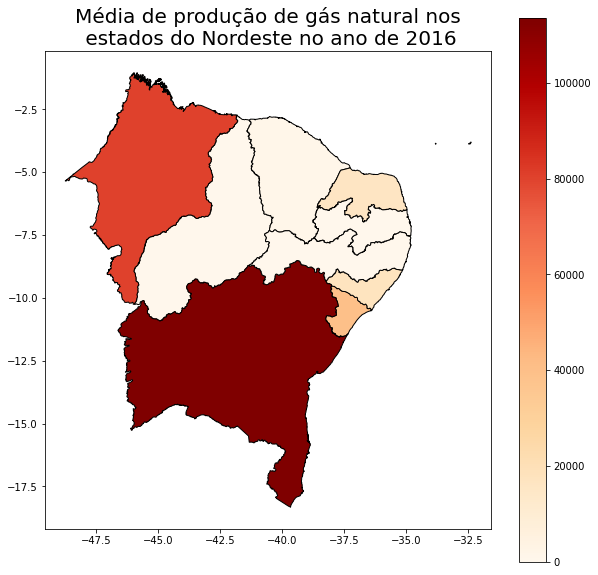

In [ ]:
nordeste_teste.plot(column = 'producao',
                    cmap="OrRd",
                   figsize = (10,10),
                   legend = True,
                   edgecolor = 'black')
plt.title("Média de produção de gás natural nos\n estados do Nordeste no ano de 2016",
         fontdict={"fontsize":20})
plt.show()

Regressão Linear

##Conclusão

## Referências bibliográficas

Companhia de Gás do Estado do Rio Grande do Sul - Sulgás. **Conheça o nosso produto: O GÁS NATURAL**. Disponível em: \<https://sulgas.rs.gov.br/sulgas/gas-natural>. Acesso em: 03 de *Dezembro* de 2021.

FRANCISCO, Wagner de Cerqueira e. Gás Natural. **Brasil Escola**. Disponível em: \<https://brasilescola.uol.com.br/geografia/fontes-gas-natural.htm>. Acesso em 03 de dezembro de 2021.

MIRKO, E. **Disponibilidade de Energia Termelétrica a gás natural na região centro-oeste**, 2009.

PRAÇA, E. R. **Distribuição de gás natural no Brasil: um enfoque crítico e de minimização de custos**. Dissertação (Mestrado em Ciências) - Fortaleza: DET/UFCE, 2003.

PRODUÇÃO de petróleo e gás natural por estado e localização. **Governo do Brasil**, 2021. Disponível em: \<https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/producao-de-petroleo-e-gas-natural-por-estado-e-localizacao>. Acesso em: 29 de Novembro de 2021.

SANTOS, E. M. **Gás Natural - estratégias para uma energia nova no Brasil**. Editora Annablume: 1ª Ed. Rio de Janeiro/RJ, 2002.

---



